#Collecting data
We will use in this article the Wisconsin Breast Cancer Diagnostic dataset from the UCI Machine Learning Repository. 

K-nearest neighbor algorithm is used to predict whether is patient is having cancer (Malignant tumor) or not (Benign tumor).

The breast cancer data includes 569 cases of cancer biopsies, each with 32 features. The first feature is an ID number, the second is the cancer diagnosis, and 30 are numeric-valued laboratory measurements. The diagnosis is coded as “B” to indicate benignor “M” to indicate malignant.
The other 30 numeric measurements comprise the mean, standard error, and worst value for 10 different characteristics of the digitized cell nuclei which are: Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave points, Symmetry, and Fractal dimension.






#Exploring and preparing the data


In [0]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
df = 'gdrive/My Drive/ALY_6020/wdbc.csv'
data=pd.read_csv(df)
data.head(5)

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,866203,M,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,0.6896,1.342,5.216,81.23,0.004428,0.02731,0.04040,0.013610,0.02030,0.002686,22.32,25.73,148.20,1538.0,0.1021,0.2264,0.32070,0.12180,0.2841,0.06541
1,91505,B,12.54,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,0.06612,0.2577,1.095,1.566,18.49,0.009702,0.01567,0.02575,0.011610,0.02801,0.002480,13.57,21.40,86.67,552.0,0.1580,0.1751,0.18890,0.08411,0.3155,0.07538
2,9010018,M,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,0.6534,1.506,4.174,63.37,0.010520,0.02431,0.04912,0.017460,0.02120,0.004867,18.51,33.22,121.20,1050.0,0.1660,0.2356,0.40290,0.15260,0.2654,0.09438
3,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,0.3550,1.534,2.302,23.13,0.007595,0.02219,0.02880,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
4,91376701,B,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.139,1.577,18.04,0.005096,0.01205,0.00941,0.004551,0.01608,0.002399,14.17,31.99,92.74,622.9,0.1256,0.1804,0.12300,0.06335,0.3100,0.08203


####We can examine the data set using the pandas’ head() method.


##Loading dataset

In [34]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dropping columns – ‘ID’ as they have no role in prediction

In [35]:
data.drop(['ID'], axis = 1) 
print(data.shape) 

(569, 32)


We can find the dimensions of the data set using the panda dataset ‘shape’ attribute.

We can observe that the data set contain 569 rows and 32 columns. ‘Diagnosis’ is the column which we are going to predict , which says if the cancer is M = Malignant or B = Benign. 1 means the cancer is malignant and 0 means benign. 

###Converting the diagnosis value of M and B to a numerical value
M (Malignant) = 1
B (Benign) = 0

In [36]:
def diagnosis_value(Diagnosis): 
    if Diagnosis == 'M': 
        return 1
    else: 
        return 0
data['Diagnosis_N'] = data['Diagnosis'].apply(diagnosis_value) 
data['Diagnosis_N']

0      1
1      0
2      1
3      0
4      0
      ..
564    1
565    0
566    1
567    0
568    0
Name: Diagnosis_N, Length: 569, dtype: int64

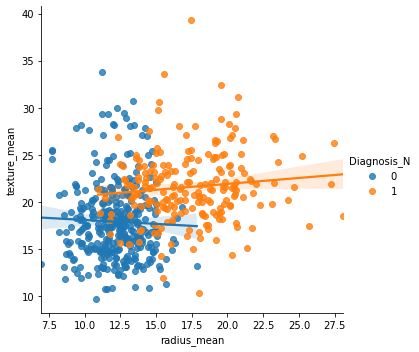

In [37]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'Diagnosis_N', data=data) 


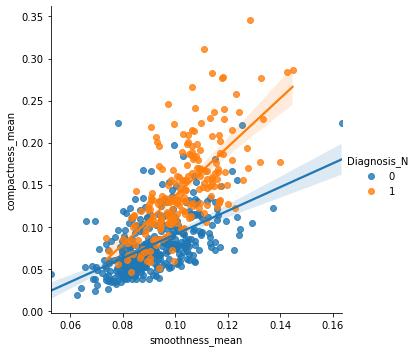

In [38]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',  
           data = data, hue = 'Diagnosis_N') 

####Missing or Null Data points
We can find any missing or null data points of the data set (if there is any) using the following pandas function.


In [39]:
data.isnull().sum()
data.isna().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Diagnosis_N                0
dtype: int64

In [40]:
x = np.array(data.iloc[:, 2:]) 
y = np.array(data['Diagnosis_N']) 
x

array([[1.900e+01, 1.891e+01, 1.234e+02, ..., 2.841e-01, 6.541e-02,
        1.000e+00],
       [1.254e+01, 1.632e+01, 8.125e+01, ..., 3.155e-01, 7.538e-02,
        0.000e+00],
       [1.508e+01, 2.574e+01, 9.800e+01, ..., 2.654e-01, 9.438e-02,
        1.000e+00],
       ...,
       [1.747e+01, 2.468e+01, 1.161e+02, ..., 2.160e-01, 9.300e-02,
        1.000e+00],
       [1.141e+01, 1.492e+01, 7.353e+01, ..., 1.811e-01, 7.427e-02,
        0.000e+00],
       [1.169e+01, 2.444e+01, 7.637e+01, ..., 2.803e-01, 9.970e-02,
        0.000e+00]])

#Splitting data to training and testing

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset in order to test our model’s prediction on this subset.
We will do this using SciKit-Learn library in Python using the train_test_split method.

In [41]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.33, random_state = 42) 
x_train

array([[2.811e+01, 1.847e+01, 1.885e+02, ..., 1.648e-01, 5.525e-02,
        1.000e+00],
       [9.742e+00, 1.912e+01, 6.193e+01, ..., 3.196e-01, 8.009e-02,
        0.000e+00],
       [1.205e+01, 2.272e+01, 7.875e+01, ..., 2.191e-01, 9.349e-02,
        0.000e+00],
       ...,
       [1.918e+01, 2.249e+01, 1.275e+02, ..., 3.193e-01, 9.221e-02,
        1.000e+00],
       [1.267e+01, 1.730e+01, 8.125e+01, ..., 2.688e-01, 6.888e-02,
        0.000e+00],
       [1.189e+01, 1.835e+01, 7.732e+01, ..., 3.397e-01, 8.365e-02,
        0.000e+00]])

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(x_train, y_train) 
train_accuracy = []
test_accuracy = []

#Prediction Score

In [43]:
knn.score(x_test, y_test) 


0.9095744680851063

###KNN of 3

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
print("k-Nearest Neighbor 3")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(x_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(x_test, y_test), '.4f')} ")

k-Nearest Neighbor 3
k-Nearest Neighbor classifier on training set: 0.9633 
k-Nearest Neighbor classifier on testing set: 0.9096 


####KNN of 5

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("k-Nearest Neighbor 5")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(x_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(x_test, y_test), '.4f')} ")

k-Nearest Neighbor 5
k-Nearest Neighbor classifier on training set: 0.9528 
k-Nearest Neighbor classifier on testing set: 0.9096 


####KNN of 15

In [46]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
print("k-Nearest Neighbor 15")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(x_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(x_test, y_test), '.4f')} ")

k-Nearest Neighbor 15
k-Nearest Neighbor classifier on training set: 0.9449 
k-Nearest Neighbor classifier on testing set: 0.9043 


####KNN of 30

In [47]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)
print("k-Nearest Neighbor 30")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(x_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(x_test, y_test), '.4f')} ")

k-Nearest Neighbor 30
k-Nearest Neighbor classifier on training set: 0.9370 
k-Nearest Neighbor classifier on testing set: 0.8777 


#Performing Cross Validation

In [0]:
neighbors = [] 
cv_scores = [] 

from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 51, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knn, x_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean())

#Misclassification error versus k

The optimal number of neighbors is  5 


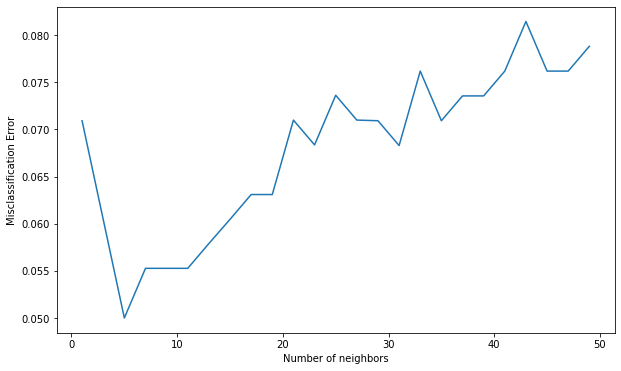

In [49]:
MSE = [1-x for x in cv_scores] 

# determining the best k 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
  
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 


#Summary
###Above is a snippet of code, where I imported the kNN model from Sci-kit Learn Library and trained it on the cancer data set, resulting in an accuracy of 90.1%. In the code above, I chose the value of k to be 5 after three cross-validations.
